In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
x = np.array([0,10,20,30,40,50,60,70,80,
             90,100])

y = np.array([0,0,0,0,0,0,0,0,0,0,0])

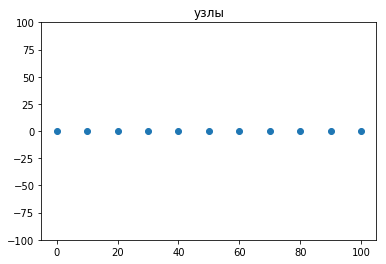

In [3]:
# отобразим получившиеся точки на графике
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_title('узлы')
plt.ylim(-100,100)
plt.show()

In [4]:
# определяем размер и радиус сетки (h)
grid_size = 1
h = 10

In [5]:
# получение min, max для x и y
x_min = min(x)
x_max = max(x)
y_min = min(y)
y_max = max(y)
# строим сетку
x_grid = np.arange (x_min-h, x_max + h, grid_size)
y_grid = np.arange (y_min-h, y_max + h, grid_size)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)

In [6]:
# центральная точка для каждого квадрата сетки
xc = x_mesh + (grid_size / 2)
yc = y_mesh + (grid_size/ 2)

In [7]:
# функция для расчета плотности точек 
def kde_quartic(d, h):
    dn = d / h
    P = (15/16) * (1 - dn ** 2) ** 2
    return P

In [8]:
intensity_list = []
for j in range(len(xc)):
    intensity_row = []
    for k in range(len(xc[0])):
        kde_value_list = []
        for i in range(len(x)):
            #рассчитываем расстояние
            d = math.sqrt((xc[j][k] - x[i]) ** 2 + (yc[j][k] - y[i]) ** 2) 
            if d <= h:
                p = kde_quartic(d,h)
            else:
                p = 0
            kde_value_list.append(p)
        # суммируем все значения плотности
        p_total = sum(kde_value_list)
        intensity_row.append(p_total)
    intensity_list.append(intensity_row)

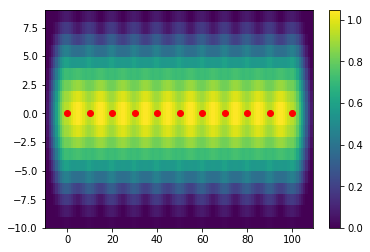

In [9]:
# визуализация тепловой карты
intensity = np.array(intensity_list)
plt.pcolormesh(x_mesh, y_mesh, intensity)
plt.plot(x, y,'ro')
plt.colorbar()

plt.show()